In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
plt.style.use('seaborn')

In [0]:
df = pd.DataFrame({'Peso': np.array([18.141,42.404,16.1,13.005,23.583,7.710,17.46,3.855,14.966,4.308,9.524,35.828]),
                    'Altura': np.array([1.087,1.613,0.953,1.003,1.156,0.978,1.092,0.572,0.940,0.597,0.838,1.473]),
                    'Cateter': np.array([37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47])})


In [0]:

def data_analisis_linreg(caminho):
    frame = pd.read_excel(caminho)
    p = frame.iloc[:,1]
    

REGRESSÃO LINEAR SIMPLES


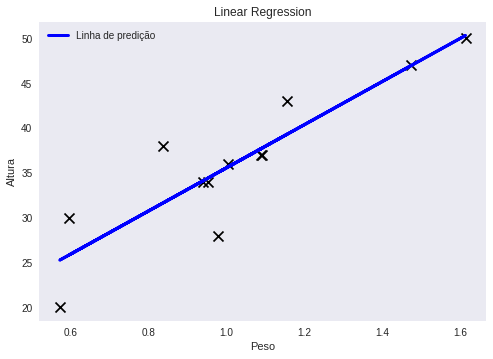

EQUATION: Theta(x) = [[24.08702511]]x + [11.47345142] , R² = 0.7968581624505837


In [202]:
def graf():
    # plt.show()
    print(f"EQUATION: Theta(x) = {a}x + {b} , R² = {R2}")

X = np.array(df[["Altura"]])
y = np.array(df[["Cateter"]])
reg = linear_model.LinearRegression()
reg.fit(X, y)
R2 = reg.score(X, y)
a = reg.coef_
b = reg.intercept_
y_pred = reg.predict(X)

plt.scatter(X, y, color='black', marker ="x", s = 100)
plt.plot(X,y_pred, color='blue', linewidth=3, label ="Linha de predição")
plt.legend()
plt.title("Linear Regression")
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.grid()
plt.show()

graf()

REGRESSAO LINEAR MULTIPLA


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

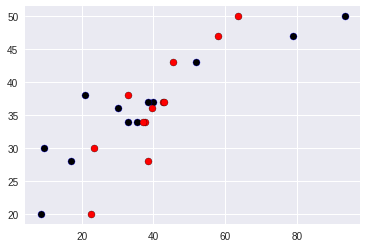

In [0]:
# cateter = altura*n1 + peso*n2
var_explicativa1 = df[["Peso"]]
var_explicativa2 = df[["Altura"]]
var_explicada = df[["Cateter"]]


plt.scatter(var_explicativa1, var_explicada, color  = "black", s = 50, edgecolor = "blue")
plt.scatter(var_explicativa2, var_explicada, color = "red", edgecolor = "black")
reg = linear_model.LinearRegression()
reg.fit(df[["Peso", "Altura"]],df[["Cateter"]])
# print(reg.coef_)
# print(reg.intercept_)
# yhat = reg.predict(df[["Peso", "Altura"]])
# plt.scatter(df[["Peso", "Altura"]], yhat)



IMPLEMENTAÇÕES


GRADIENTE DESCENDENTE


In [0]:
ind = np.array([40.0, 93.5, 35.5, 30.0, 52.0, 17.0, 38.5,  8.5, 33.0,  9.5, 21.0, 79.0])
dep = np.array([42.8, 63.5, 37.5, 39.5, 45.5, 38.5, 43.0, 22.5, 37.0, 23.5, 33.0, 58.0])
u = np.array([1,2,3,4,5])
v = np.array([5,7,9,11,13])
x = np.array([1 ,2 ,3, 4, 5])
y = np.array([2, 4, 6, 8,10])


In [0]:
def gradiente_descendente(x, y, Custo = None):
    wo = w = 0
    inter = 1000
    alpha = 0.08 #learning rate
    n = len(x)
    custo = custot = np.array([])

    for t in range(inter):
        y_pred = x*w + wo
        custot = ((1/n) * sum([val**2 for val in (y-y_pred)]))
        custo = np.append(custo, custot) 
        derivada_w = -(2/n)*sum(x*(y-y_pred))
        derivada_wo = -(2/n)*sum(y-y_pred)
        w = w - alpha*derivada_w
        wo = wo - alpha*derivada_wo
        print(f"Theta(x) = {w}x + {wo}, custo ({custot}),  [{t}]")
    
    plt.scatter(x, y, marker = "x", color = "black")
    plt.plot(x,y_pred, color = "red")
    plt.xlabel("Independent variable")
    plt.ylabel("Dependent Variable")
    plt.show()
    if Custo:
      plt.plot(np.array([t for t in range(0, inter)]), custo, color = "orange")
      plt.xlabel("Iteration")
      plt.ylabel("Cost function")
      plt.show()
   

gradiente_descendente(x, y, Custo = False)

GRADIENTE DESCENDENTE ESTOCASTICO

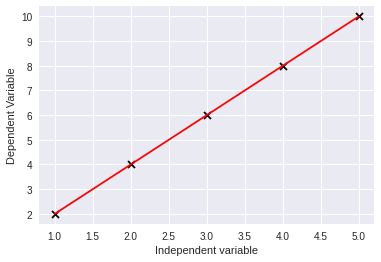

Theta(x) = 1.923076923076923x + 0.38461538461538475


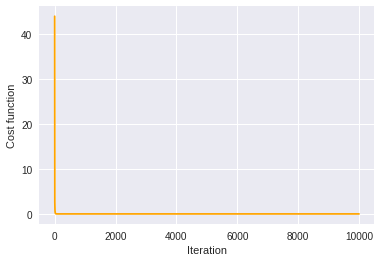

In [0]:
def gradiente_descendente_estocastico(x, y, Custo = None):
    wo = w = 0
    inter = 10000
    alpha = 0.02  #learning rate
    n = len(x)
    custo = custot = np.array([])
    for t in range(inter):
        y_pred = x*w + wo
        custot = ((1/n) * sum([val**2 for val in (y-y_pred)]))
        custo = np.append(custo, custot) 
        wo = wo + alpha*(y- y_pred)
        w = w + alpha*(y - y_pred)*x
  
    plt.scatter(x, y, marker = "x", color = "black")
    plt.plot(x,y_pred, color = "red")
    plt.xlabel("Independent variable")
    plt.ylabel("Dependent Variable")
    plt.show()
    print(f"Theta(x) = {w[-1]}x + {wo[-1]}")

    if Custo:
      plt.plot(np.array([t for t in range(0, inter)]), custo, color = "orange")
      plt.xlabel("Iteration")
      plt.ylabel("Cost function")
      plt.show()

gradiente_descendente_estocastico(x,y, Custo =True)

REGRESSÃO LINEAR ANALÍTICA


In [0]:
x = np.array([[1 ,2 ,3, 4]])
y = np.array([[2, 4, 6, 8]])

df = pd.DataFrame({'Peso': np.array([18.141,42.404,16.1,13.005,23.583,7.710,17.46,3.855,14.966,4.308,9.524,35.828]),
                    'Altura': np.array([1.087,1.613,0.953,1.003,1.156,0.978,1.092,0.572,0.940,0.597,0.838,1.473]),
                    'Cateter': np.array([37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47])})


In [0]:
X = np.ones(36).reshape(12,3)
X[:,1] = df["Altura"]
X[:,2] = df["Peso"]
y = np.array(df["Cateter"]).reshape((12,1))
X = np.matrix(X)
y = np.matrix(y)
XT = X.T


In [196]:
w = np.linalg.inv((XT*X))*XT*y
w

matrix([[20.11432093],
        [ 8.80257597],
        [ 0.40766255]])

In [208]:
df = pd.DataFrame({'Peso': np.array([18.141,42.404,16.1,13.005,23.583,7.710,17.46,3.855,14.966,4.308,9.524,35.828]),
                    'Altura': np.array([1.087,1.613,0.953,1.003,1.156,0.978,1.092,0.572,0.940,0.597,0.838,1.473]),
                    'Cateter': np.array([37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47])})

X = np.ones(24).reshape(12,2)
X[:,1] = df["Altura"]
y = np.array(df["Cateter"]).reshape((12,1))
X = np.matrix(X)
y = np.matrix(y)
XT = X.T
w = np.linalg.inv((XT*X))*XT*y
w

print(f"Theta(x) = {w[1]}x + {w[0]}")

Theta(x) = [[24.08702511]]x + [[11.47345142]]


In [200]:
w = np.linalg.inv((XT*X))*XT*y
w

matrix([[11.47345142],
        [24.08702511]])

In [0]:
x = np.matrix(x)
x = x.reshape(2,2)
y = np.array([2, 4, 6, 8])
y = y.reshape(2,2)

print(x)
print(y)


print(x.shape,y.shape)

type(x*y)


[[1 2]
 [3 4]]
[[2 4]
 [6 8]]
(2, 2) (2, 2)


numpy.matrix

In [0]:
X = np.array(np.ones((1,4)))
h = np.append(X, np.append(x,y))
h = np.matrix(h).reshape(4,3)
h


matrix([[1., 1., 1.],
        [1., 1., 2.],
        [3., 4., 2.],
        [4., 6., 8.]])

In [0]:
i = np.array([[1,2,3,4,5,6,7,8,9]])
print(i)
print(i.shape)
print(i[0])
print(i.reshape((3,3)))
u =i.reshape((3,3))
print(u.shape)
print(u[1][2])


[[1 2 3 4 5 6 7 8 9]]
(1, 9)
[1 2 3 4 5 6 7 8 9]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3)
6


In [0]:
u = u.T
u[0]=1


In [0]:
u = u.T
u

array([[1, 2, 3],
       [1, 5, 6],
       [1, 8, 9]])

In [0]:
a = np.arange(12)
a = a.reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [0]:
print(a[:,2])

[ 2  6 10]


In [0]:
a[:,2] = 1
a


array([[ 0,  1,  1,  3],
       [ 4,  5,  1,  7],
       [ 8,  9,  1, 11]])

In [0]:
b = np.matrix(a)
b[:,0]=1
b

matrix([[ 1,  1,  1,  3],
        [ 1,  5,  1,  7],
        [ 1,  9,  1, 11]])